# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [1]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from  colorama  import  Fore 

### Leer conjunto de datos y primer vistazo

In [2]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
df_raw = pd.read_csv('../data/mushrooms.csv')
df_raw.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploración de datos

In [3]:
# Descripción del conjunto de datos, estándard.
print(f"\n{Fore.LIGHTCYAN_EX}Número de filas y columnas:\n{Fore.RESET}")
print(df_raw.shape)  # Muestra (n_filas, n_columnas)
print(f"\n{Fore.LIGHTCYAN_EX}Informacion del dataset:\n{Fore.RESET}")
print(df_raw.info())
print(f"\n{Fore.LIGHTCYAN_EX}Columnas del dataset:\n{Fore.RESET}")
print(df_raw.columns)  # Lista las columnas del dataset



Número de filas y columnas:

(8124, 23)

Informacion del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surf

In [4]:
# Información sobre el tipo de datos de cada feature.
print(f"\n{Fore.LIGHTCYAN_EX}Tipo de datos de cada columna:\n{Fore.RESET}")
print(df_raw.dtypes)  # Muestra el tipo de datos de cada columna


Tipo de datos de cada columna:

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


#### Calcular el número de nulos de cada feature

In [5]:
# Igual que otras veces, una linea, contar los nulos por variable.
print(f"\n{Fore.LIGHTCYAN_EX}Valores nulos por columna:\n{Fore.RESET}")
df_raw.isnull().sum()  # Suma los valores nulos por columna


Valores nulos por columna:



class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [6]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
unique_values_df = pd.DataFrame({
    'features': df_raw.columns,
    'n_values': [df_raw[col].nunique() for col in df_raw.columns]
})
unique_values_df

,features,n_values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


#### Tratar aquellos valores que entendamos que sean nulos


In [7]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.
null_values = df_raw.isnull().sum()
print(null_values)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


No hay valores nulos

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [8]:
# Dejar por el camino si procede.
# Identificar columnas con un solo valor único
constant_columns = [col for col in df_raw.columns if df_raw[col].nunique() == 1]
print(f"\n{Fore.LIGHTCYAN_EX}Columnas que tienen un único valor en todas sus filas:\n{Fore.RESET}")
print(constant_columns)


Columnas que tienen un único valor en todas sus filas:

['veil-type']


#### Separar entre variables predictoras y variables a predecir

In [9]:
# La variable que trata de predecir este conjunto de datos es 'class'.
y = df_raw['class']  # Variable a predecir
X = df_raw.drop(columns='class')  # Variables predictoras

#### Codificar correctamente las variables categóricas a numéricas

In [10]:
# One Hot Encoder (una linea).


# Crear el encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Ajustar el encoder a los datos (X)
enc.fit(X)

# Transformar los datos categóricos en un formato codificado
X_encoded = enc.transform(X).toarray()

# Mostrar las primeras filas del resultado codificado
X_encoded[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0.,

#### Train test split

In [11]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

Utilizamos esta linea para dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. 

1. **train_test_split**

    Es una función proporcionada por scikit-learn que divide los datos en dos partes: uno para entrenar el modelo y otro para probarlo. El objetivo es que el modelo entrene con una parte de los datos (conjunto de entrenamiento) y luego se evalúe con la otra parte (conjunto de prueba) para verificar su capacidad de generalización.

2. **X** y **y**

    **X:** Representa las variables predictoras (features), es decir, las entradas del modelo.
    
    **y:** Es la variable objetivo o target (en este caso la columna class), la que queremos predecir.
    
3. **X_train** y **X_test**

    **X_train:** Es el subconjunto de las variables predictoras que se utilizarán para entrenar el modelo.

    **X_test:** Es el subconjunto de las variables predictoras que se utilizarán para evaluar el modelo después de haber sido entrenado.
    
4. **y_train** y **y_test**

    **y_train:** Es el subconjunto de la variable objetivo correspondiente a los datos de entrenamiento.
    
    **y_test:** Es el subconjunto de la variable objetivo correspondiente a los datos de prueba.

5. **test_size=0.33**

    Este parámetro indica el porcentaje de datos que se destinará al conjunto de prueba. En este caso, 0.33 significa que el 33% de los datos será asignado al conjunto de prueba (X_test y y_test), y el 67% restante al conjunto de entrenamiento (X_train y y_train).

6. **random_state=42**

    Este parámetro se utiliza para fijar la semilla aleatoria. Esto significa que si ejecutas el código varias veces con random_state=42, obtendrás siempre la misma división de los datos entre entrenamiento y prueba. Esto es útil para reproducir los resultados y garantizar que el modelo sea evaluado con el mismo conjunto de datos cada vez que se ejecute el código.

    El número 42 es simplemente una elección arbitraria que garantiza la reproducibilidad. Cualquier número podría ser utilizado, pero el 42 es popular en la comunidad de programación como una referencia a "The Hitchhiker's Guide to the Galaxy" 😊.

**Ejemplo completo:**

Este código dividirá los datos en dos subconjuntos:

+ 67% de los datos se utilizarán para entrenar el modelo.
+ 33% de los datos se utilizarán para probar el modelo después de que haya sido entrenado.
+ Visualización de los conjuntos:
+ X_train y y_train: Datos que usarás para entrenar tu modelo.
+ X_test y y_test: Datos con los que probarás el modelo una vez entrenado, para evaluar su rendimiento en datos nuevos.

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

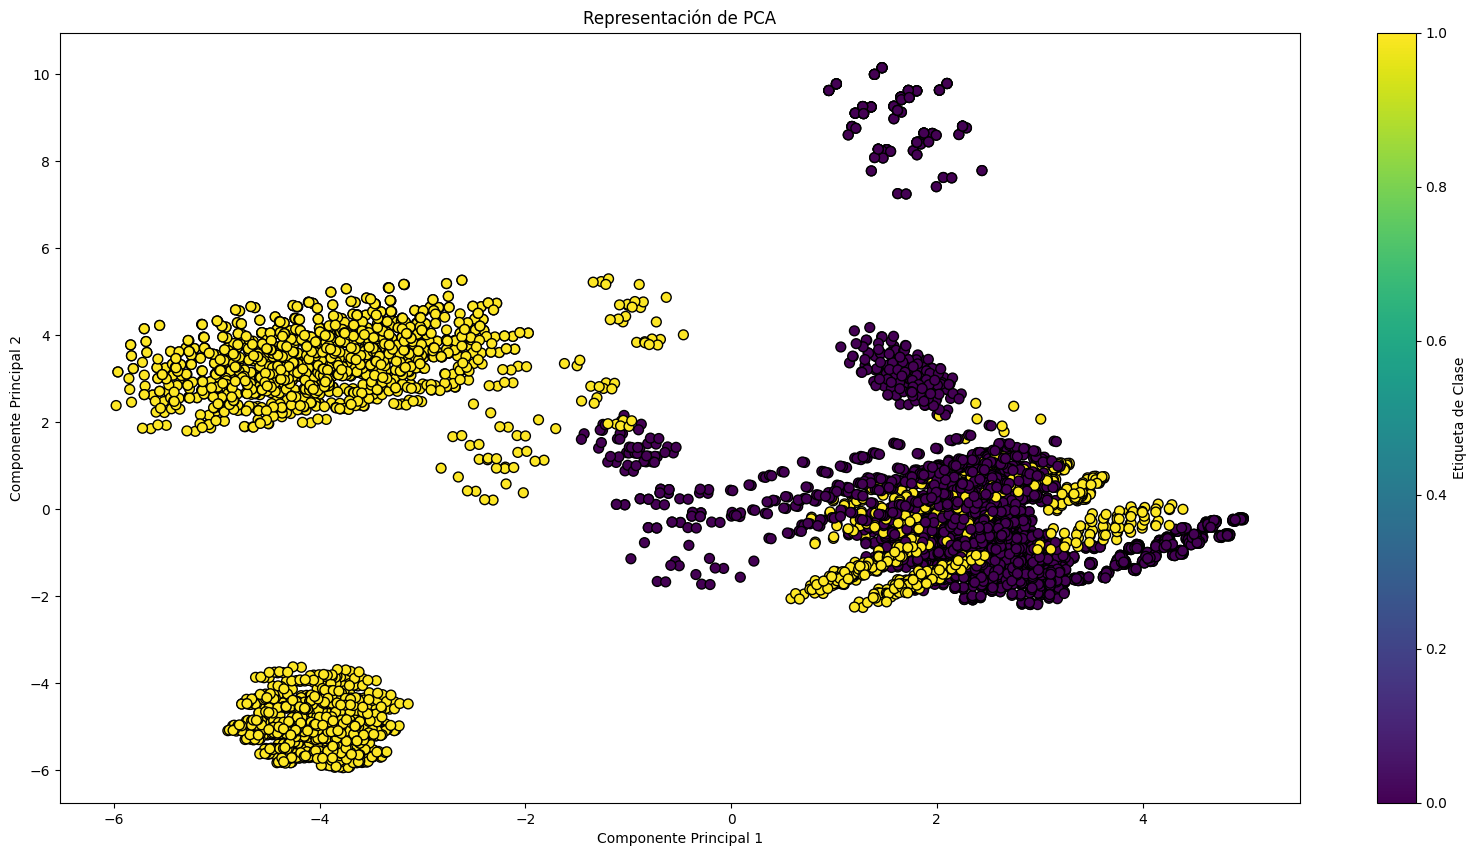

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Aplicar StandardScaler para escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
pca.fit(X_scaled)  # Ajusta el modelo PCA a los datos
X_pca = pca.transform(X_scaled)  # Transforma los datos a los componentes principales
# X_pca = pca.fit_transform(X_scaled) # Este método es una combinación de fit y transform en un solo paso.

# Gráfico de dispersión de los datos transformados con PCA
plt.figure(figsize=(20, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map({'e': 0, 'p': 1}), cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de PCA')
plt.colorbar(label='Etiqueta de Clase')
plt.show()

# # Representar en un scatterplot y poner en color las etiquetas de entrenamiento

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Definir el clasificador y el número de estimadores
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar en train
clf.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = clf.predict(X_test)

# 3. Calcular la precisión sobre test
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
accuracy

1.0

Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [14]:
X_train.shape

(5443, 117)

¿Muchas features no? Vamos a reducirlas usando PCA.

In [15]:
n_features = range(1, X_train.shape[1] + 1)  # Probar desde 1 hasta el número máximo de features # definir un rango de valores a probar
scores = []

for n in n_features:
    # Hacer PCA sobre X_train con n componentes
    # 1. Definir PCA
    pca = PCA(n_components=n)
    
    # 2. Aprender PCA sobre X_train
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Entrenar Random Forest
    # 1. Definir el Random Forest
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # 2. Entrenar el clasificador
    clf.fit(X_train_pca, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = clf.predict(X_test_pca)
    
    # Calcular y guardar el score (precisión en este caso)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)


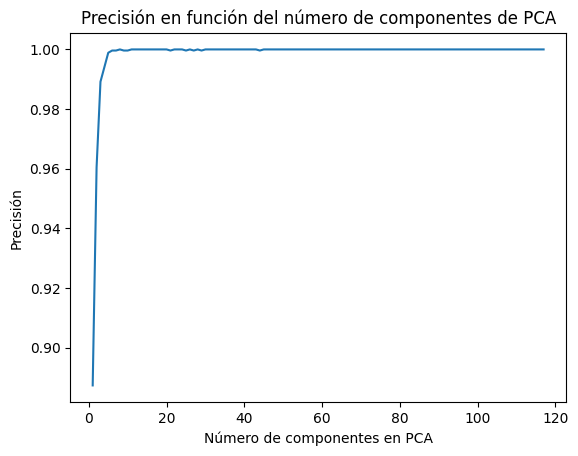

In [16]:
# Visualizar los resultados con Seaborn
sns.lineplot(x=n_features, y=scores)
plt.xlabel('Número de componentes en PCA')
plt.ylabel('Precisión')
plt.title('Precisión en función del número de componentes de PCA')
plt.show()

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




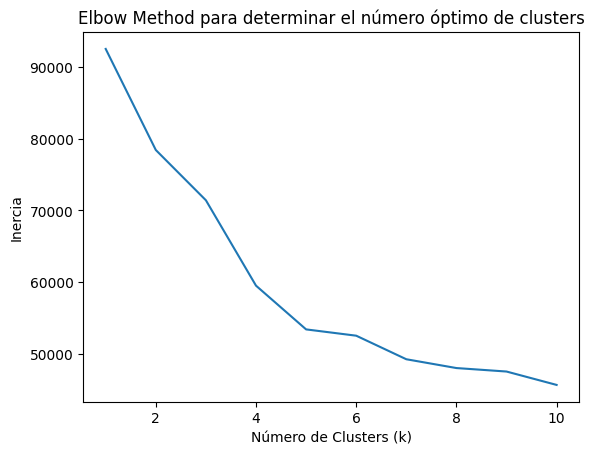

In [17]:
import matplotlib.pyplot as plt

# Definir un rango de valores para k (número de clusters)
k_values = range(1, 11)  # Por ejemplo, probar de 1 a 10 clusters
scores = []

for k in k_values:
    # Definir KMeans y ajustar el modelo
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)  # X_encoded es tu conjunto de datos codificado
    
    # Guardar la inercia (la suma de las distancias cuadradas dentro del cluster)
    scores.append(kmeans.inertia_)

# Visualizar los resultados con Seaborn
sns.lineplot(x=k_values, y=scores)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method para determinar el número óptimo de clusters')
plt.show()

+ Ejes del gráfico:

    + Eje X: Representa el número de clusters (k) que se probaron en el modelo KMeans, desde 1 hasta 10 en este caso.
    + Eje Y: Muestra la inercia para cada número de clusters. *La inercia es una medida de la suma de las distancias cuadradas de los puntos de datos a sus respectivos centroides.* Cuanto menor es la inercia, más compactos y cercanos están los puntos dentro de sus clusters.

+ Interpretación:

    Inercia decreciente: A medida que aumenta el número de clusters, la inercia disminuye. Esto se debe a que, con más clusters, los puntos se agrupan de manera más específica, lo que reduce la distancia promedio de los puntos a sus centroides.

+ Método del codo (Elbow Method):

    El propósito de este gráfico es identificar el número óptimo de clusters. Idealmente, buscamos un punto donde la disminución de la inercia comienza a volverse menos pronunciada, formando una especie de "codo" en la curva.

    El "codo" suele marcar el punto en el que añadir más clusters no mejora significativamente la compactación de los datos.

    En este gráfico, parece que el codo podría estar en algún lugar entre 3 y 5 clusters. A partir de este punto, la reducción en la inercia se vuelve menos significativa, lo que sugiere que aumentar el número de clusters más allá de este rango no agrega mucho valor a la agrupación. 

El método del codo es subjetivo y no siempre forma un codo bien definido. 

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

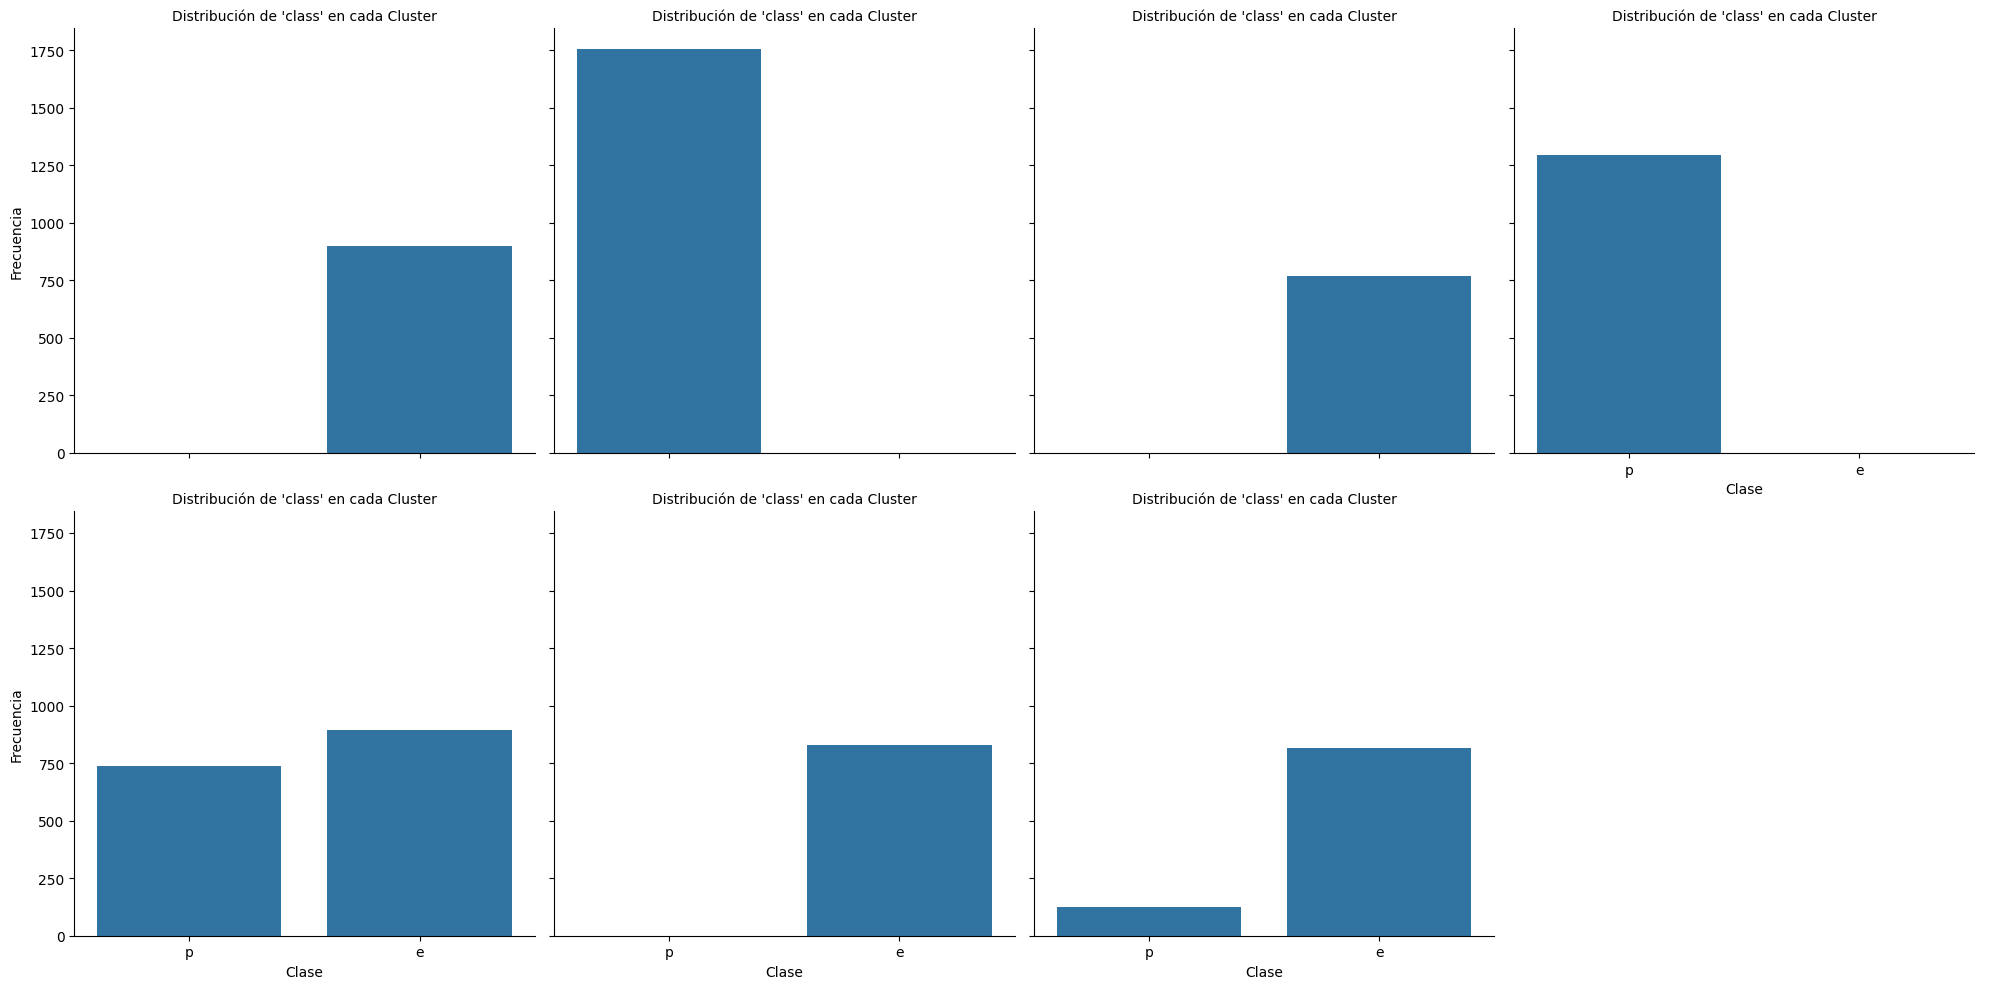

In [26]:
# Hacer una copia del DataFrame para trabajar con los clusters
df_clustered_encoded = df_raw.copy()

# Paso 1: Definir y entrenar KMeans con el número óptimo de clusters (ejemplo: k = 4)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_encoded)  # X_encoded es tu conjunto de datos ya codificado

# Obtener los clusters predichos
df_clustered_encoded['cluster'] = kmeans.labels_  # Añadimos los labels de los clusters a la copia del DataFrame

# Paso 2: Preparar el catplot para visualizar la distribución de los clusters
# Supongamos que estamos interesados en ver la distribución de la variable 'class' en cada cluster

# Pintar el gráfico de categorías
ax = sns.catplot(col='cluster', x='class', data=df_clustered_encoded, kind='count', col_wrap=4)

# Mostrar el gráfico
ax.set_titles("Distribución de 'class' en cada Cluster")
ax.set_axis_labels("Clase", "Frecuencia")
plt.show()



+ Con 3 clusters:
    + La separación fue bastante mixta: Un cluster contenía mayormente hongos comestibles, otro estaba casi completamente lleno de venenosos, pero había un tercer cluster con una mezcla significativa de ambas clases.

    + La segmentación no era lo suficientemente clara como para asegurar una buena separación entre las clases de hongos comestibles y venenosos.

+ Con 4 clusters:
    + Se logró una mejor separación entre hongos comestibles y venenosos, con clusters más homogéneos.

    + Sin embargo, algunos clusters todavía contenían una mezcla de clases, lo que indicaba que el número de clusters podría ser insuficiente para una separación más precisa.

+ Con 5 clusters:
    + La segmentación mejoró, con clusters más puros, especialmente para hongos venenosos. Se formaron algunos clusters con predominancia de hongos comestibles y otros con venenosos.

    + Aunque algunos clusters aún contenían una mezcla de clases, este número de clusters mostró una mejora en la agrupación de los datos.

+ Con 6 clusters:
    + La separación de clases se volvió más clara en algunos clusters, con hongos venenosos y comestibles agrupados en diferentes clusters.

    + Aún persistían clusters mixtos, aunque en menor cantidad que en versiones anteriores. La segmentación seguía mejorando, pero la mezcla todavía estaba presente en algunos grupos.
    
+ Con 7 clusters:

    + Se logró una mayor pureza en algunos clusters, especialmente en aquellos que contenían solo hongos comestibles o solo venenosos.

    + Sin embargo, en otros clusters la mezcla de clases todavía existía. Parecía que aumentar el número de clusters comenzaba a crear más grupos pequeños y mixtos, lo que sugería que podríamos estar acercándonos a la sobresegmentación.

**Conclusión general:**

Mejoras progresivas se observaron al aumentar el número de clusters de 3 a 7, con una mejor separación de clases, pero todavía quedaban algunos clusters mixtos.
Con 5 a 6 clusters se alcanzó un buen balance entre segmentación y separación de clases, pero a partir de 7 clusters podría haberse generado una sobresegmentación en algunos grupos.

Decidimos aplicar el **Silhouette Score** para tomar una mejor decisión. Esta métrica mide cómo de bien se ajusta cada punto a su cluster, con valores entre -1 y 1 (más cercano a 1 significa una mejor separación entre clusters).

Número de clusters: 3, Silhouette Score: 0.1763
Número de clusters: 4, Silhouette Score: 0.2417
Número de clusters: 5, Silhouette Score: 0.2527
Número de clusters: 6, Silhouette Score: 0.1967
Número de clusters: 7, Silhouette Score: 0.2122


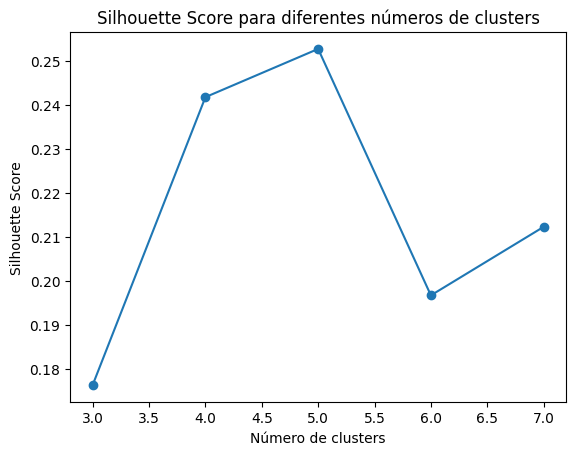

In [28]:
from sklearn.metrics import silhouette_score

# Probar varios valores de clusters (de 3 a 7 en este caso)
cluster_range = range(3, 8)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_encoded)
    
    # Calcular el Silhouette Score
    score = silhouette_score(X_encoded, kmeans.labels_)
    silhouette_scores.append(score)

# Mostrar los resultados
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f'Número de clusters: {n_clusters}, Silhouette Score: {score:.4f}')

# Visualizar los resultados con un gráfico
import matplotlib.pyplot as plt

plt.plot(list(cluster_range), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()


Parece que el numero  de clusters optimo es 5, así que nos quedamos con ese valor.

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

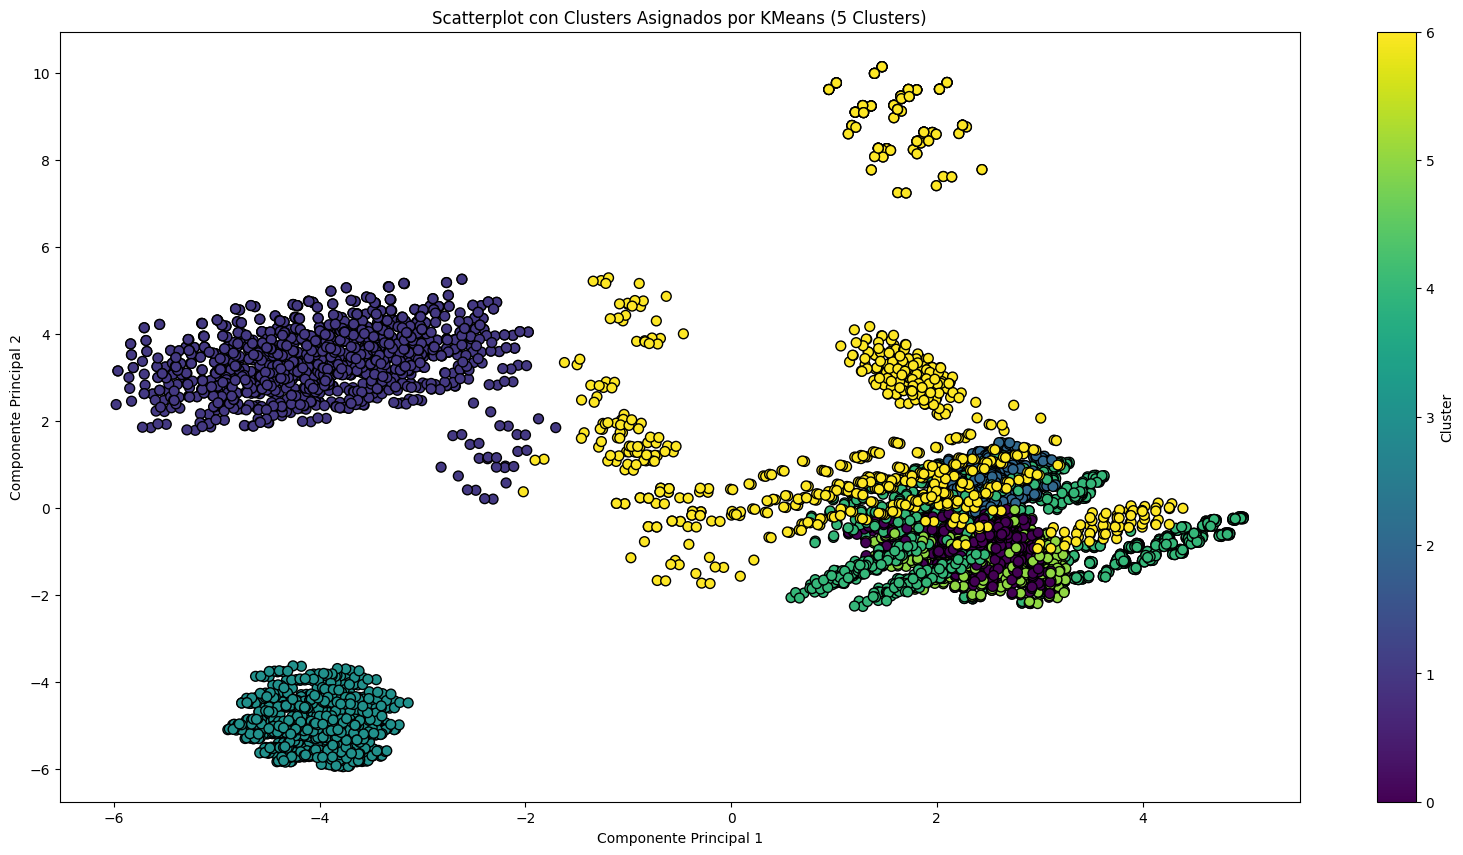

In [32]:
# Entrenar PCA para representar.

# Usar un color por cada cluster.
plt.figure(figsize=(20, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustered_encoded['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Scatterplot con Clusters Asignados por KMeans (5 Clusters)')
plt.colorbar(label='Cluster')
plt.show()


¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.